#Liberaries


In [1]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle

#preprossing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#evaluate model
from sklearn.metrics import (confusion_matrix,classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, balanced_accuracy_score, matthews_corrcoef,
                             cohen_kappa_score, fbeta_score, hamming_loss,
                             jaccard_score, brier_score_loss)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, make_scorer
from IPython.core.debugger import set_trace
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load_Models

In [3]:
import pickle

def load_models(model_paths):
  models = {}
  for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
      models[model_name] = pickle.load(file)
  return models


In [4]:
model_paths ={
    'RFc_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/RFc_model.pkl',
    'GBc_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/GBc_model.pkl',


    'ETc_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/ETc_model.pkl',

    'DTc_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/DTc_model.pkl',
    'KNc_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/KNc_model.pkl',

    'MLP_model': '/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/MLP_model.pkl',


}

loaded_models = load_models(model_paths)

In [5]:
#load 4 dataframes after preprossing
X_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_test.csv')

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1670, 30), (282, 30), (1670, 1), (282, 1))

In [7]:
classifiers = [
    'Random Forest',
    'Gradient Boosting',
    'Extra Trees',
    'Decision Tree',
    'K-Neighbors',
    'MLP'
]
RFc_Classifier=RandomForestClassifier(n_estimators=100)
GBc_Classifier=GradientBoostingClassifier(n_estimators=1000)
ETc_Classifier=ExtraTreesClassifier(n_estimators=100)
DTc_Classifier=DecisionTreeClassifier()
KNc_Classifier=KNeighborsClassifier()
MLP_Classifier=MLPClassifier()


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
specificity_results = []
logloss_results = []
balanced_acc_results = []
mcc_results = []
kappa_results = []
f2_results = []
hamming_results = []
jaccard_results = []
brier_results = []

#Use and Evaluate models


In [8]:
def calc(model, model_name):
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    cm = confusion_matrix(y_test,y_pred)

    # Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    # Logarithmic Loss (Log Loss)
    logloss = log_loss(y_test,y_pred)
    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_test,y_pred)
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test,y_pred)
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test,y_pred)
    # F2 Score
    f2 = fbeta_score(y_test,y_pred,beta=2)
    # Hamming Loss
    hamming = hamming_loss(y_test,y_pred)
    # Jaccard Index
    jaccard = jaccard_score(y_test,y_pred)
    # Brier Score
    brier = brier_score_loss(y_test,y_pred)
    #append results
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)
    specificity_results.append(specificity)
    logloss_results.append(logloss)
    balanced_acc_results.append(balanced_acc)
    mcc_results.append(mcc)
    kappa_results.append(kappa)
    f2_results.append(f2)
    hamming_results.append(hamming)
    jaccard_results.append(jaccard)
    brier_results.append(brier)

    print(f'{model_name}')
    # Plot confusion matrix
    fig,ax=plt.subplots(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')

    # Save confusion matrix
    save_path = f'/content/drive/MyDrive/ASD/Balanced_Adult/results/{model_name}_confusion_matrix.png'
    plt.savefig(save_path)
    plt.show()

    print('================================================')
    #Classification Report
    print('Classification Report:')
    print(classification_report(y_pred, y_test))
    print('================================================')
    ###########
    # Compute Precision-Recall and ROC curves
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Compute AUC for both curves
    pr_auc = auc(recall, precision)
    roc_auc = auc(fpr, tpr)

    # Plot both curves on the same figure
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall (AUC={pr_auc:.2f})')
    plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.2f})')
    plt.xlabel('Recall / False Positive Rate')
    plt.ylabel('Precision / True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.title(f'{model_name} Precision Recall and ROC Curve')
    plt.savefig(f'/content/drive/MyDrive/ASD/Balanced_Adult/results/{model_name}precision_recall_ROC_curves.png')
    plt.show()
    ###########

    print('================================================')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.2f}')

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1:.2f}')
    print('================================================')
    print(f'specificity: {specificity:.2f}')
    print(f'Logarithmic Loss: {logloss:.2f}')
    print(f'Balanced Accuracy: {balanced_acc:.2f}')
    print(f'Matthews Correlation Coefficient (MCC): {mcc:.2f}')
    print(f'Cohen\'s Kappa: {kappa:.2f}')
    print(f'F2 Score: {f2:.2f}')
    print(f'Hamming Loss: {hamming:.2f}')
    print(f'Jaccard Index: {jaccard:.2f}')
    print(f'Brier Score: {brier:.2f}')

RFc_model


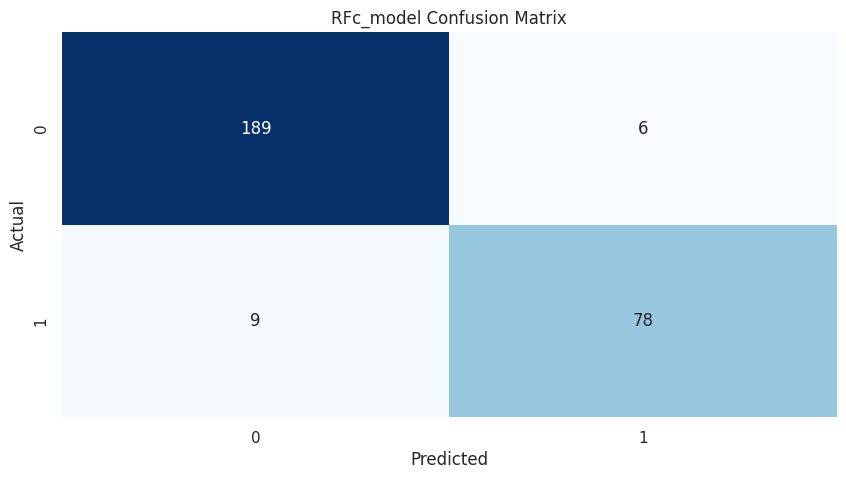

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       198
           1       0.90      0.93      0.91        84

    accuracy                           0.95       282
   macro avg       0.93      0.94      0.94       282
weighted avg       0.95      0.95      0.95       282



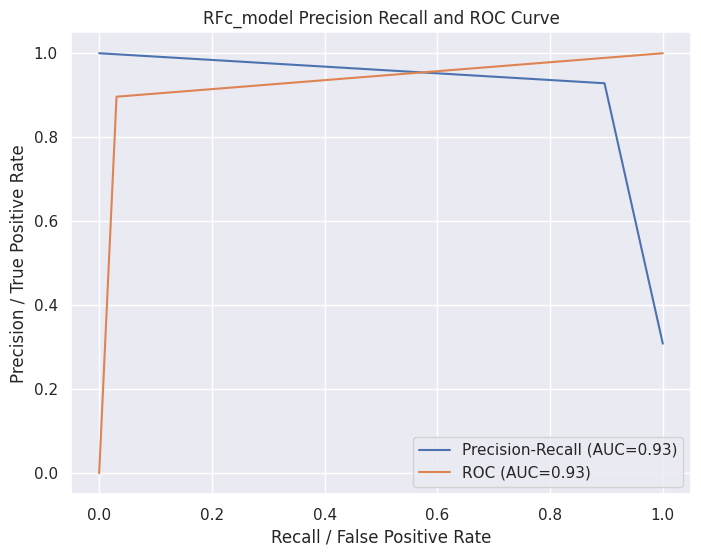

Confusion Matrix:
 [[189   6]
 [  9  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       195
           1       0.93      0.90      0.91        87

    accuracy                           0.95       282
   macro avg       0.94      0.93      0.94       282
weighted avg       0.95      0.95      0.95       282

Accuracy: 0.95
Precision: [0.30851064 0.92857143 1.        ]
Recall: [1.         0.89655172 0.        ]
F1 Score: 0.91
specificity: 0.97
Logarithmic Loss: 1.92
Balanced Accuracy: 0.93
Matthews Correlation Coefficient (MCC): 0.87
Cohen's Kappa: 0.87
F2 Score: 0.90
Hamming Loss: 0.05
Jaccard Index: 0.84
Brier Score: 0.05
GBc_model


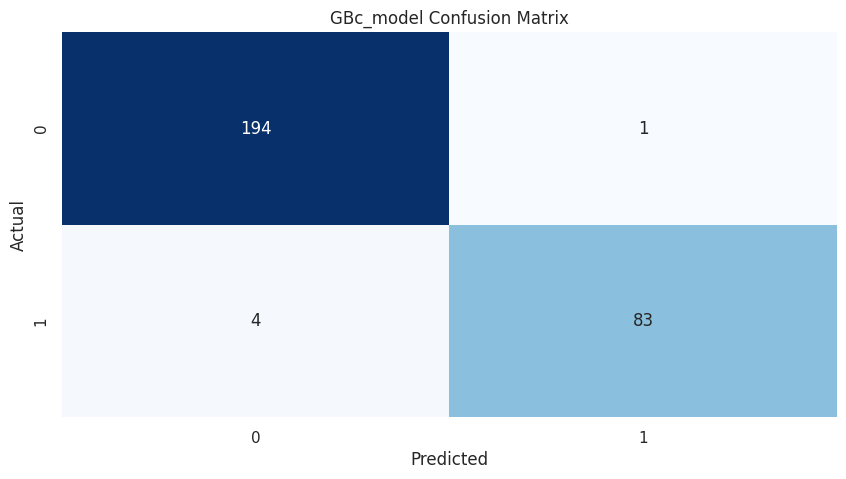

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       198
           1       0.95      0.99      0.97        84

    accuracy                           0.98       282
   macro avg       0.97      0.98      0.98       282
weighted avg       0.98      0.98      0.98       282



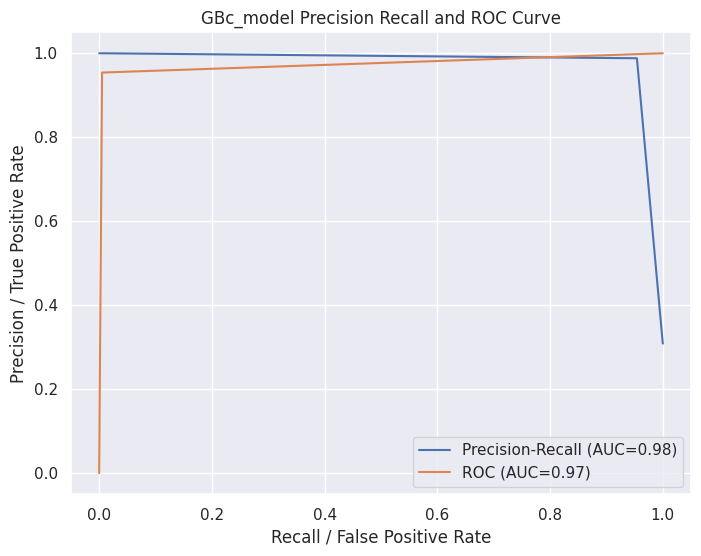

Confusion Matrix:
 [[194   1]
 [  4  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.99      0.95      0.97        87

    accuracy                           0.98       282
   macro avg       0.98      0.97      0.98       282
weighted avg       0.98      0.98      0.98       282

Accuracy: 0.98
Precision: [0.30851064 0.98809524 1.        ]
Recall: [1.         0.95402299 0.        ]
F1 Score: 0.97
specificity: 0.99
Logarithmic Loss: 0.64
Balanced Accuracy: 0.97
Matthews Correlation Coefficient (MCC): 0.96
Cohen's Kappa: 0.96
F2 Score: 0.96
Hamming Loss: 0.02
Jaccard Index: 0.94
Brier Score: 0.02
ETc_model


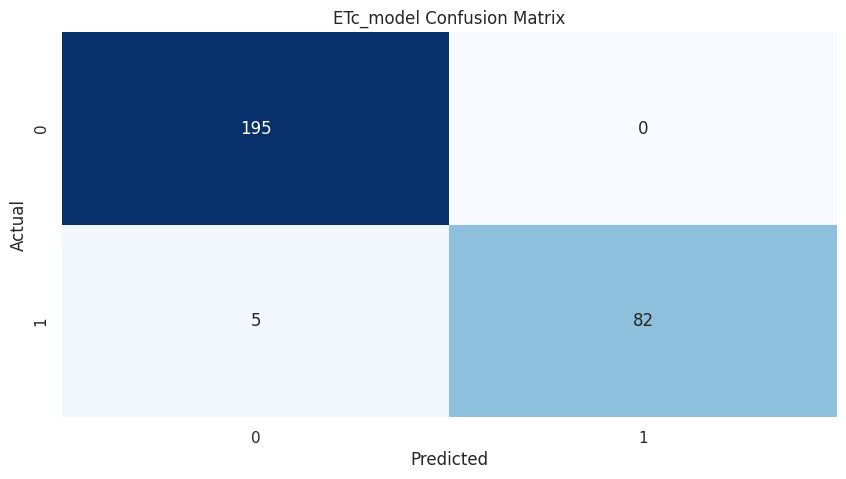

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       200
           1       0.94      1.00      0.97        82

    accuracy                           0.98       282
   macro avg       0.97      0.99      0.98       282
weighted avg       0.98      0.98      0.98       282



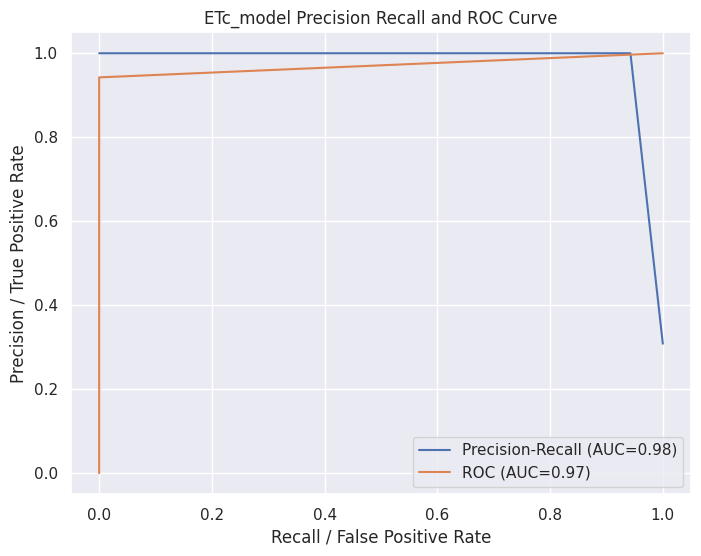

Confusion Matrix:
 [[195   0]
 [  5  82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       195
           1       1.00      0.94      0.97        87

    accuracy                           0.98       282
   macro avg       0.99      0.97      0.98       282
weighted avg       0.98      0.98      0.98       282

Accuracy: 0.98
Precision: [0.30851064 1.         1.        ]
Recall: [1.         0.94252874 0.        ]
F1 Score: 0.97
specificity: 1.00
Logarithmic Loss: 0.64
Balanced Accuracy: 0.97
Matthews Correlation Coefficient (MCC): 0.96
Cohen's Kappa: 0.96
F2 Score: 0.95
Hamming Loss: 0.02
Jaccard Index: 0.94
Brier Score: 0.02
DTc_model


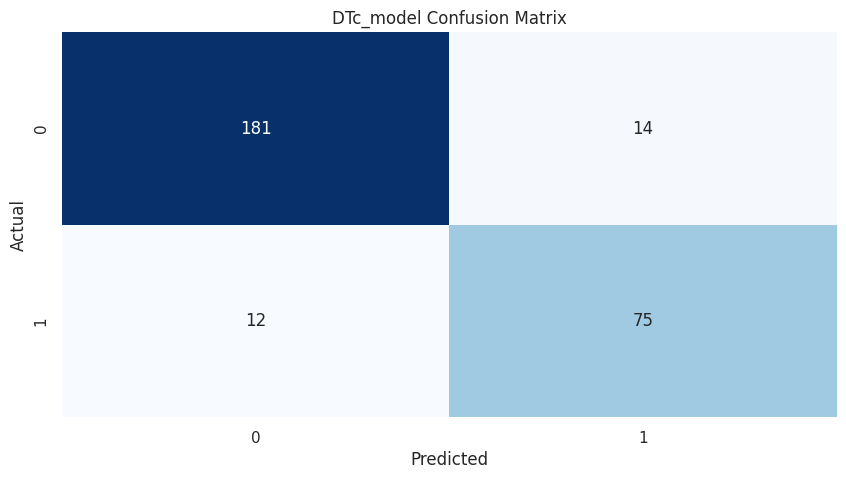

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       193
           1       0.86      0.84      0.85        89

    accuracy                           0.91       282
   macro avg       0.90      0.89      0.89       282
weighted avg       0.91      0.91      0.91       282



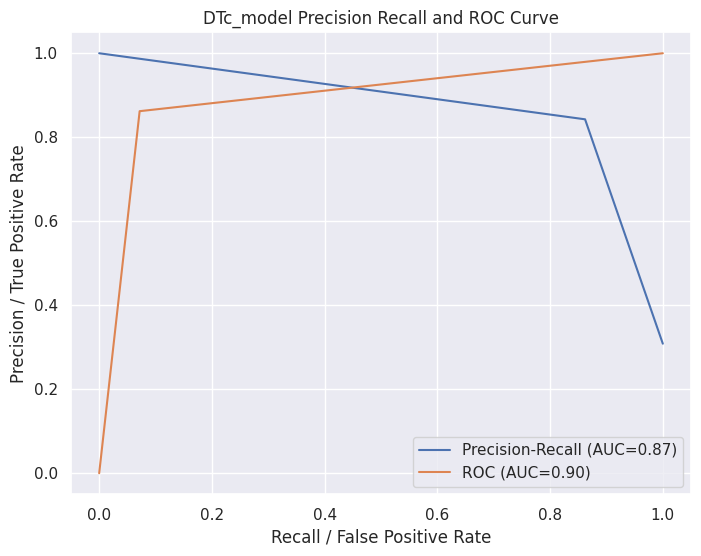

Confusion Matrix:
 [[181  14]
 [ 12  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       195
           1       0.84      0.86      0.85        87

    accuracy                           0.91       282
   macro avg       0.89      0.90      0.89       282
weighted avg       0.91      0.91      0.91       282

Accuracy: 0.91
Precision: [0.30851064 0.84269663 1.        ]
Recall: [1.         0.86206897 0.        ]
F1 Score: 0.85
specificity: 0.93
Logarithmic Loss: 3.32
Balanced Accuracy: 0.90
Matthews Correlation Coefficient (MCC): 0.79
Cohen's Kappa: 0.79
F2 Score: 0.86
Hamming Loss: 0.09
Jaccard Index: 0.74
Brier Score: 0.09
KNc_model


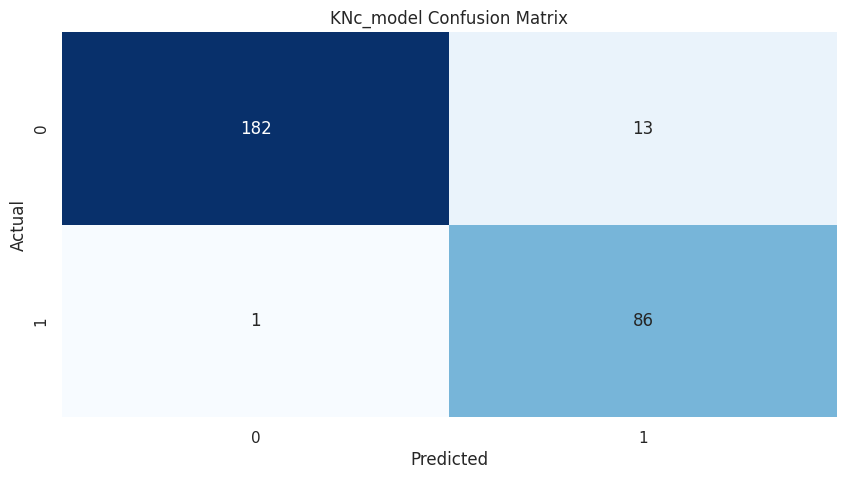

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       183
           1       0.99      0.87      0.92        99

    accuracy                           0.95       282
   macro avg       0.96      0.93      0.94       282
weighted avg       0.95      0.95      0.95       282



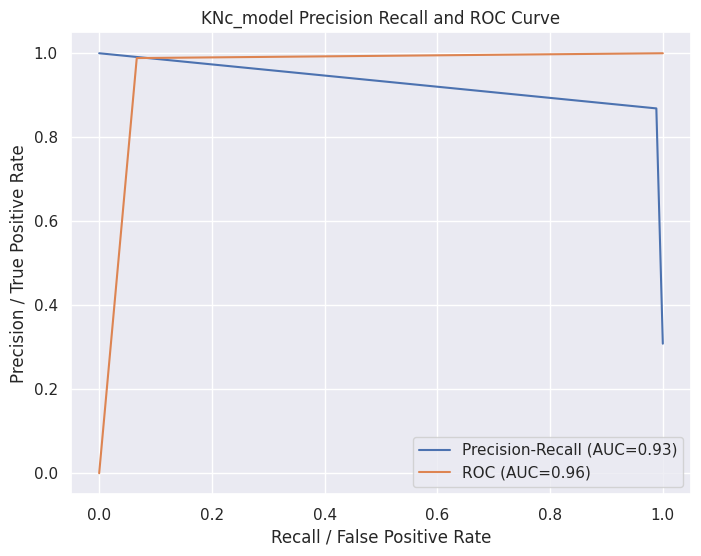

Confusion Matrix:
 [[182  13]
 [  1  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       195
           1       0.87      0.99      0.92        87

    accuracy                           0.95       282
   macro avg       0.93      0.96      0.94       282
weighted avg       0.96      0.95      0.95       282

Accuracy: 0.95
Precision: [0.30851064 0.86868687 1.        ]
Recall: [1.         0.98850575 0.        ]
F1 Score: 0.92
specificity: 0.93
Logarithmic Loss: 1.79
Balanced Accuracy: 0.96
Matthews Correlation Coefficient (MCC): 0.89
Cohen's Kappa: 0.89
F2 Score: 0.96
Hamming Loss: 0.05
Jaccard Index: 0.86
Brier Score: 0.05
MLP_model


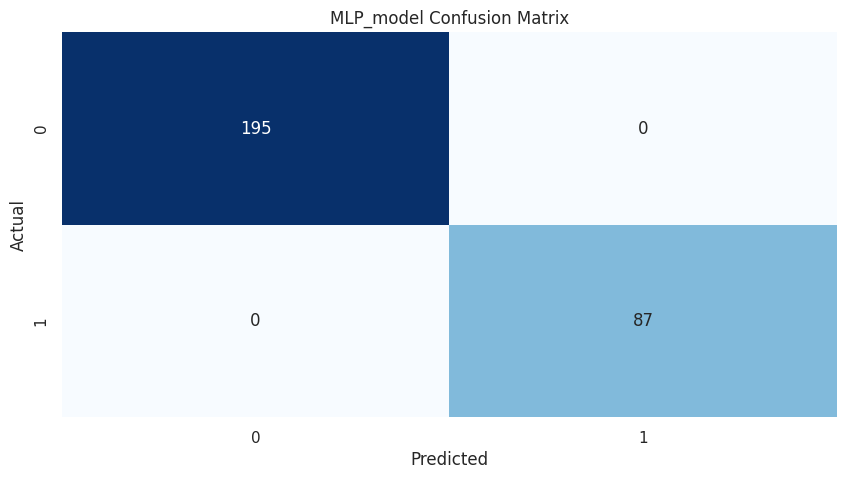

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        87

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



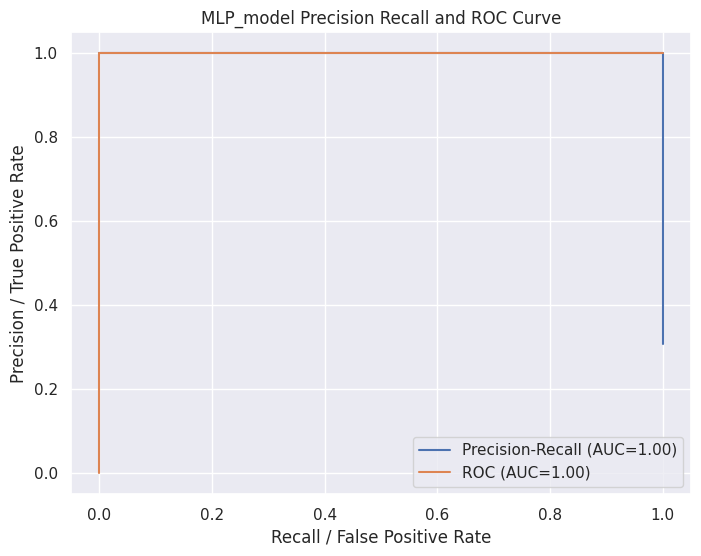

Confusion Matrix:
 [[195   0]
 [  0  87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        87

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282

Accuracy: 1.00
Precision: [0.30851064 1.         1.        ]
Recall: [1. 1. 0.]
F1 Score: 1.00
specificity: 1.00
Logarithmic Loss: 0.00
Balanced Accuracy: 1.00
Matthews Correlation Coefficient (MCC): 1.00
Cohen's Kappa: 1.00
F2 Score: 1.00
Hamming Loss: 0.00
Jaccard Index: 1.00
Brier Score: 0.00


In [9]:
calc(loaded_models['RFc_model'],'RFc_model')
calc(loaded_models['GBc_model'],'GBc_model')
calc(loaded_models['ETc_model'],'ETc_model')
calc(loaded_models['DTc_model'],'DTc_model')
calc(loaded_models['KNc_model'],'KNc_model')
calc(loaded_models['MLP_model'],'MLP_model')


#models Evaluation






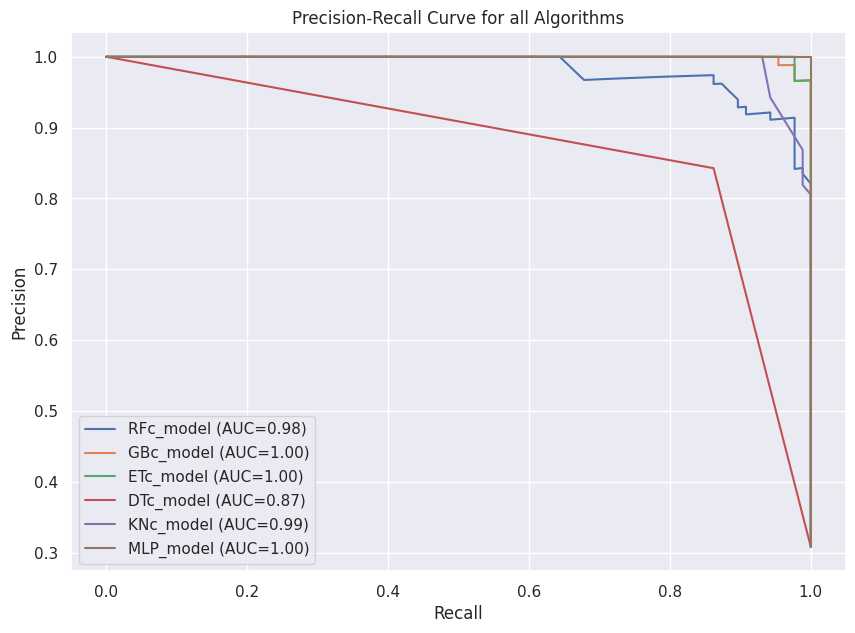

In [10]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 7))

for model_name, model in loaded_models.items():
  if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_test)[:, 1]
  else:
    y_score = model.decision_function(X_test)

  precision, recall, _ = precision_recall_curve(y_test, y_score)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f'{model_name} (AUC={pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for all Algorithms')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/results/all_precision_recall_curves.png')
plt.show()


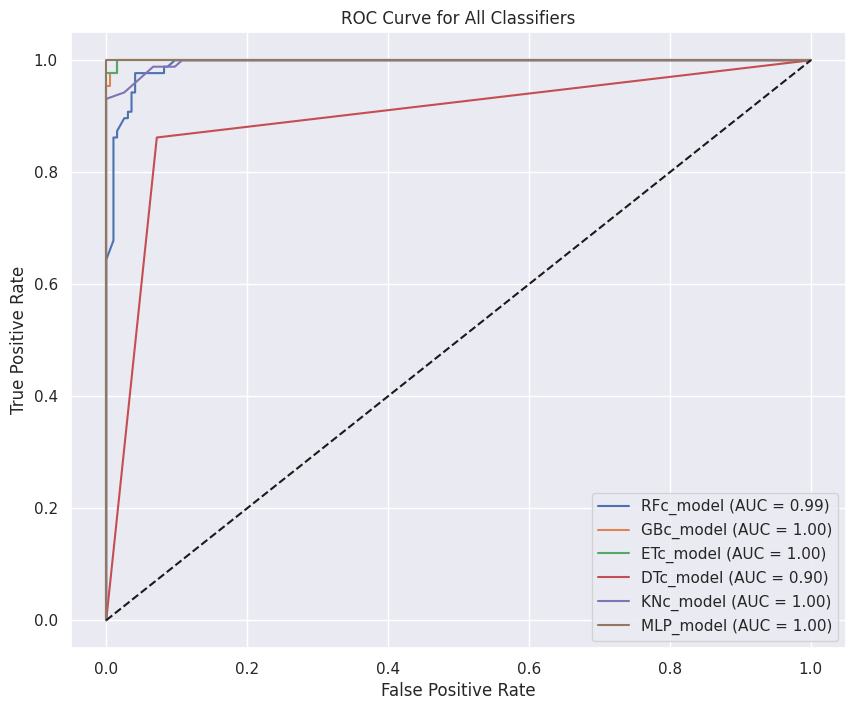

In [11]:

import matplotlib.pyplot as plt
# Draw ROC curve for all algorithms
plt.figure(figsize=(10, 8))
for model_name, model in loaded_models.items():
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        continue  # Skip models that don't have appropriate prediction methods

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/results/all_models_roc_curve.png')
plt.show()


In [12]:
finalresult=pd.DataFrame({
    'Algoritms':classifiers,'Accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1_score':f1_results,'specificity':specificity_results,'Logarithmic Loss':logloss_results,'Balanced Accuracy':balanced_acc_results,'MCC':mcc_results,'Cohen\'s Kappa':kappa_results,'F2 Score':f2_results,'Hamming Loss':hamming_results,'Jaccard Index':jaccard_results,'Brier Score':brier_results
    })

# Save DataFrame to Excel
finalresult.to_excel('/content/drive/MyDrive/ASD/Balanced_Adult/results/finalresult.xlsx', index=False)

finalresult

Algoritms  Accuracy  precision    recall  f1_score  specificity  \
0      Random Forest  0.946809   0.928571  0.896552  0.912281     0.969231   
1  Gradient Boosting  0.982270   0.988095  0.954023  0.970760     0.994872   
2        Extra Trees  0.982270   1.000000  0.942529  0.970414     1.000000   
3      Decision Tree  0.907801   0.842697  0.862069  0.852273     0.928205   
4        K-Neighbors  0.950355   0.868687  0.988506  0.924731     0.933333   
5                MLP  1.000000   1.000000  1.000000  1.000000     1.000000   

   Logarithmic Loss  Balanced Accuracy       MCC  Cohen's Kappa  F2 Score  \
0      1.917216e+00           0.932891  0.874407       0.874130  0.902778   
1      6.390719e-01           0.974447  0.958347       0.958043  0.960648   
2      6.390719e-01           0.971264  0.958627       0.957772  0.953488   
3      3.323174e+00           0.895137  0.785382       0.785275  0.858124   
4      1.789401e+00           0.960920  0.892049       0.887924  0.961969   
5      2.220446e-16           1.000000  1.000000       1.000000  1.000000   

   Hamming Loss  Jaccard Index  Brier Score  
0      0.053191       0.838710     0.053191  
1      0.017730       0.943182     0.017730  
2      0.017730       0.942529     0.017730  
3      0.092199       0.742574     0.092199  
4      0.049645       0.860000     0.049645  
5      0.000000       1.000000     0.000000

#models Comparesion

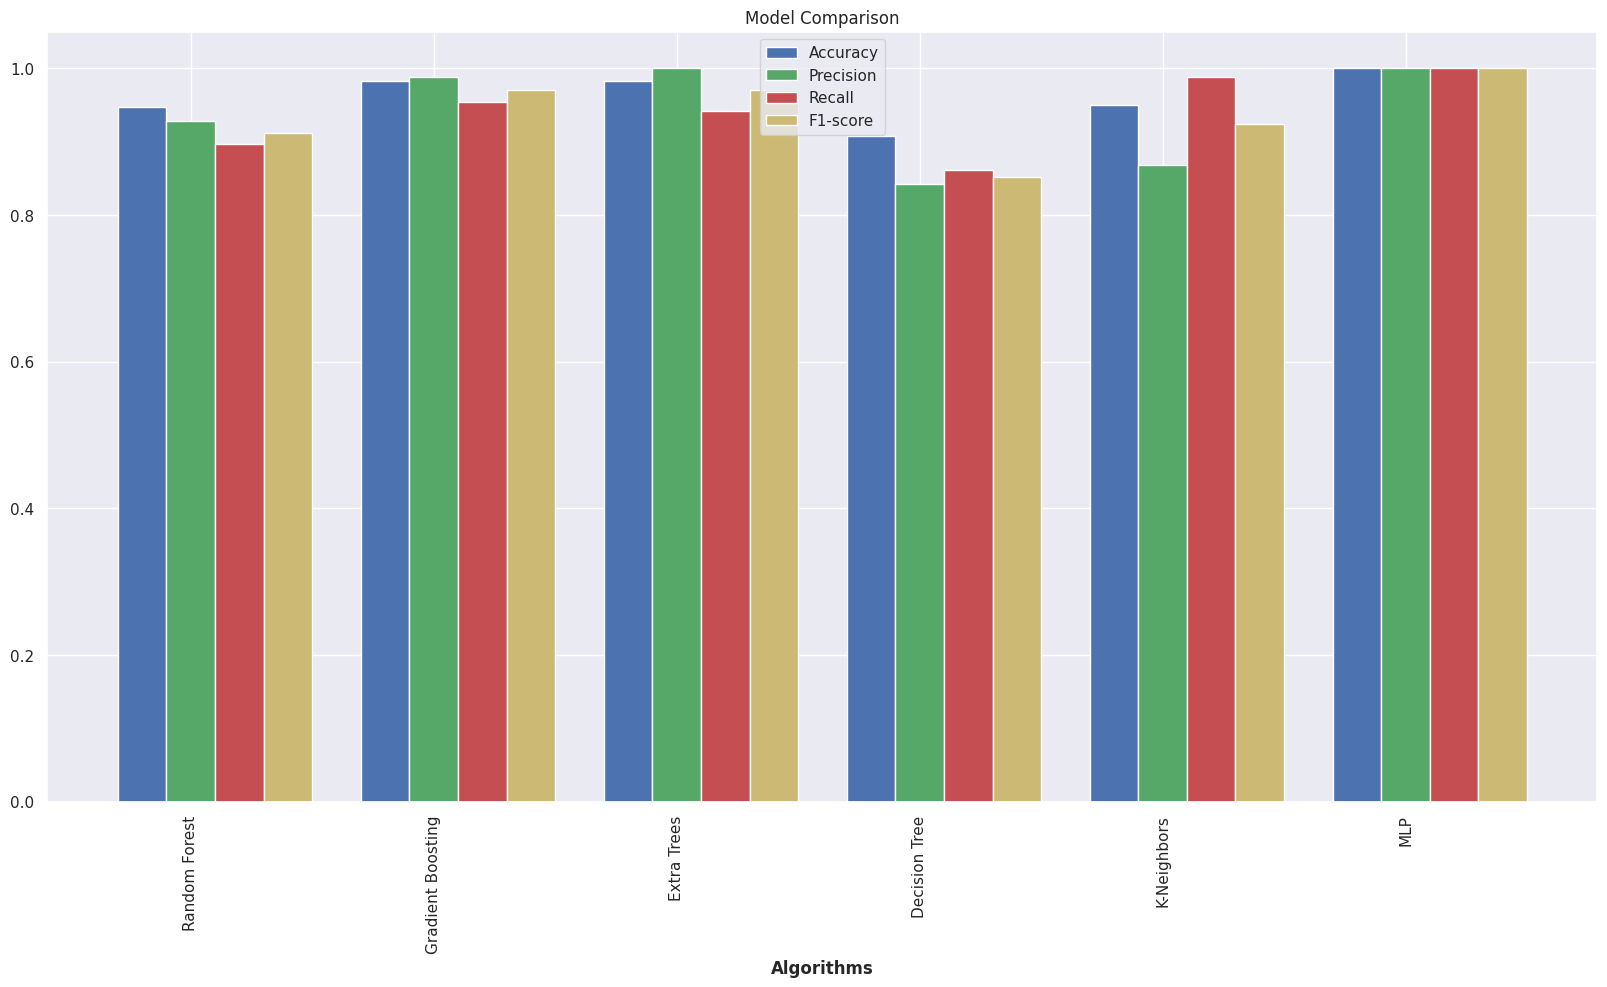

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

bar_width = 0.2  # Adjust as needed

# Set position of bar on X axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.bar(r1, accuracy_results, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_results, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall_results, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_results, color='y', width=bar_width, edgecolor='white', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers, rotation=90)

# Save the figure
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/results/model_comparison.png')
# Create legend & Show graphic
plt.legend()
plt.title('Model Comparison')
plt.show()



# Explainable AI (XAI)

In [ ]:
!pip uninstall lime -y
!pip install lime --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8efc52b99dd081b9e40ebf19b8bdf891da11b7f6b52c4df699cf32f88438721b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

def explain_models_with_lime(models, X_train, X_test, instance_indices, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/"):
    """
    Explain predictions for multiple models using LIME and save as PNG.

    Args:
        models: Dictionary of models to explain
        X_train: Training DataFrame for LIME explainer
        X_test: Test DataFrame for explanations
        instance_indices: Indices of instances to explain
        save_path_prefix: Directory to save PNG files
    """

    # Initialize LIME explainer
    explainer = LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=[str(i) for i in range(len(models))],
        mode='classification'
    )

    # Process each model and instance
    for model_name, model in models.items():
        print(f"Generating explanations for {model_name}...")

        for idx in instance_indices:
            # Create explanation
            exp = explainer.explain_instance(
                X_test.values[idx],
                model.predict_proba
            )

            # Extract explanation data
            explanation_list = exp.as_list()

            # Create formatted text
            explanation_text = f"LIME Explanation - {model_name} (Instance {idx})\n\n"
            for feature, weight in explanation_list:
                explanation_text += f"{feature}: {weight:.4f}\n"

            # Create and save figure
            plt.figure(figsize=(8, len(explanation_list)*0.4 + 1))
            plt.text(0.01, 0.99, explanation_text,
                    fontsize=10,
                    va='top',
                    ha='left',
                    family='monospace')
            plt.axis('off')

            # Save PNG file
            png_path = f"{save_path_prefix}lime_{model_name}_{idx}.png"
            plt.savefig(png_path, bbox_inches='tight')
            plt.close()

            print(f"Saved PNG explanation to {png_path}")

# Example usage
instance_indices_to_explain = [0, 5, 10]
explain_models_with_lime(loaded_models, X_train, X_test, instance_indices_to_explain)

Generating explanations for RFc_model...
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_RFc_model_0.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_RFc_model_5.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_RFc_model_10.png
Generating explanations for GBc_model...
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_GBc_model_0.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_GBc_model_5.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_GBc_model_10.png
Generating explanations for ETc_model...
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_ETc_model_0.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_ETc_model_5.png
Saved PNG explanation to /content/drive/MyDrive/ASD/Balanced_Adult/XAI/lime/lime_ETc_model_10.png
G

In [ ]:
!pip uninstall shap -y
!pip install shap --upgrade

Found existing installation: shap 0.47.2
Uninstalling shap-0.47.2:
  Successfully uninstalled shap-0.47.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00


In [ ]:
#Explain models with shap
import shap
import matplotlib.pyplot as plt
models_to_explain = {
    'RFc_model': loaded_models['RFc_model'],
    'GBc_model': loaded_models['GBc_model'],
    'ETc_model': loaded_models['ETc_model'],
    'DTc_model': loaded_models['DTc_model']
}
def explain_models_shap(models, X_test, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_Adult/XAI/shap/"):


    for model_name, model in models.items():
        print(f"Explaining {model_name}:")

        # Initialize SHAP explainer and compute SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        # Visualize results and save the plots
        save_path = f"{save_path_prefix}{model_name}shap_summary_plot_.png"  # Create the save path
        shap.summary_plot(shap_values, X_test, show=False)  # Generate summary plot without showing it
        plt.savefig(save_path, bbox_inches='tight')  # Save the plot
        plt.close()  # Close the plot to avoid displaying it

explain_models_shap(models_to_explain, X_test)

Explaining RFc_model:
Explaining GBc_model:
Explaining ETc_model:
Explaining DTc_model:


In [ ]:
import shap
import matplotlib.pyplot as plt
models_to_explain1 = {

    'KNc_model': loaded_models['KNc_model'],
    'MLP_model': loaded_models['MLP_model']

}
def explain_models_shap1(models, X_test, save_path_prefix="/content/drive/MyDrive/ASD/Balanced_Adult/XAI/shap/"):

    for model_name, model in models.items():
        print(f"Explaining {model_name}:")

        # Initialize SHAP explainer and compute SHAP values
        # Using shap.kmeans to sample the background data for faster computation
        background_data = shap.kmeans(X_train, 10) # Using 10 cluster centroids as background
        explainer = shap.KernelExplainer(model.predict_proba, background_data)
        shap_values = explainer.shap_values(X_test)


        # Visualize results and save the plots
        save_path = f"{save_path_prefix}{model_name}shap_summary_plot_.png"  # Create the save path
        shap.summary_plot(shap_values, X_test, show=False)  # Generate summary plot without showing it
        plt.savefig(save_path, bbox_inches='tight')  # Save the plot
        plt.close()  # Close the plot to avoid displaying it

explain_models_shap1(models_to_explain1, X_test)

Explaining KNc_model:


  0%|          | 0/282 [00:00<?, ?it/s]

Explaining MLP_model:


  0%|          | 0/282 [00:00<?, ?it/s]

KeyboardInterrupt: 